In [103]:
import re

import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import numpy as np
import os
import zipfile
import xlrd
import plotly.express as px
import re
from scipy import stats

sns.set(rc={'figure.figsize': (16,6)}, style='whitegrid')

In [10]:
df = pd.read_csv(r'datasets/2.9 conversion.csv')

In [14]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [15]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [16]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
impressions              int64
clicks                   int64
spent                  float64
total_conversion         int64
approved_conversion      int64
dtype: object

In [17]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,impressions,clicks,spent,total_conversion,approved_conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [18]:
df.shape

(1143, 11)

In [19]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
impressions            0
clicks                 0
spent                  0
total_conversion       0
approved_conversion    0
dtype: int64

In [20]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
impressions            1130
clicks                  183
spent                   869
total_conversion         32
approved_conversion      16
dtype: int64

In [21]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


<Axes: xlabel='impressions', ylabel='Count'>

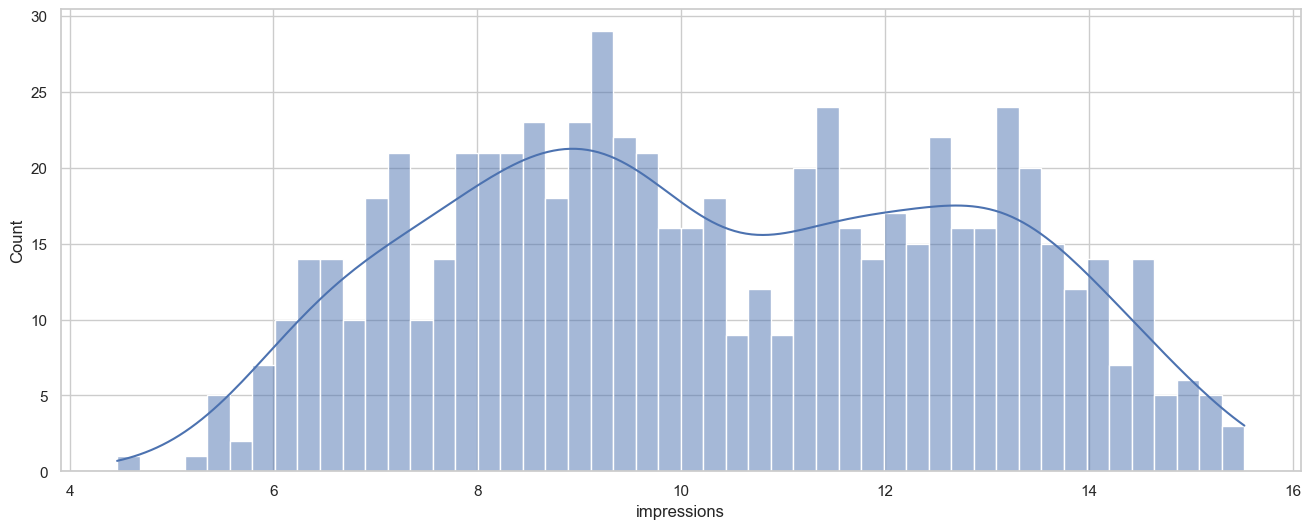

In [32]:
sns.histplot(np.log(df.groupby('fb_campaign_id').impressions.sum()), kde=True, bins=50)

In [66]:
conv = df.groupby(['xyz_campaign_id', 'fb_campaign_id'], as_index=False).impressions.sum()

In [67]:
conv['impressions'] = conv['impressions'].apply(np.log)

In [74]:
conv['xyz_campaign_id'] = conv['xyz_campaign_id'].astype('str')

In [75]:
conv

,xyz_campaign_id,fb_campaign_id,impressions
0,916,103916,8.902456
1,916,103917,9.790375
2,916,103920,6.541030
3,916,103928,9.035034
4,916,103929,7.557473
...,...,...,...
686,1178,179977,13.937527
687,1178,179978,13.365386
688,1178,179979,11.928546
689,1178,179981,13.580108


<Axes: xlabel='impressions', ylabel='Count'>

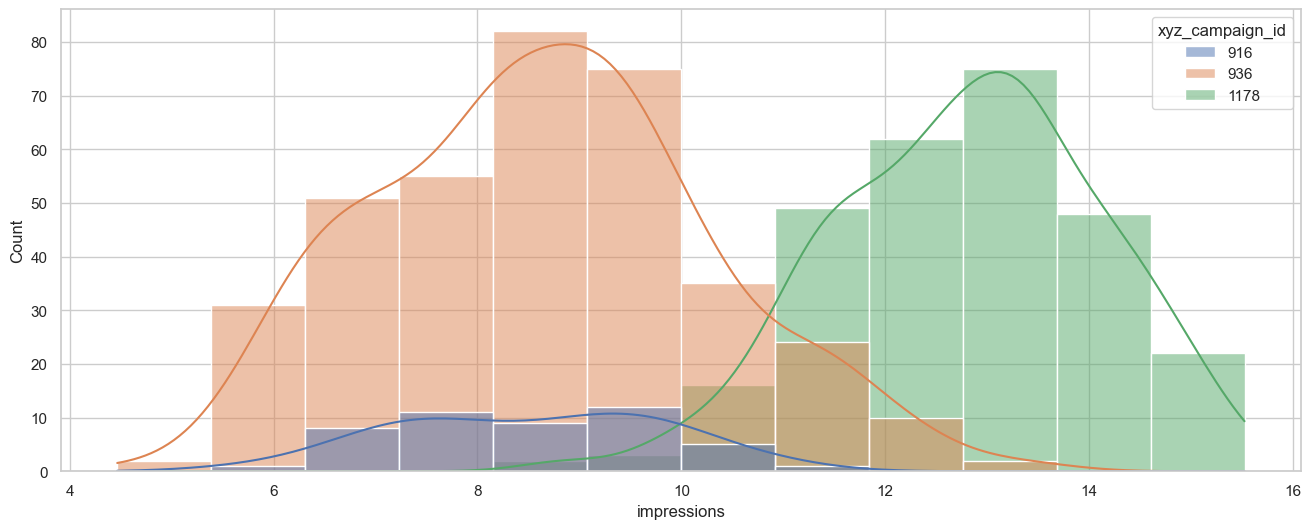

In [78]:
sns.histplot(data=conv, x='impressions', hue='xyz_campaign_id', kde=True)

In [79]:
df['ctr'] = df['clicks']/df['impressions']

In [80]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [81]:
df.ctr.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: ctr, dtype: float64

In [88]:
df.groupby('ad_id', as_index=False).ctr.sum().sort_values(by='ctr',ascending=False)

,ad_id,ctr
150,738637,0.001059
440,950224,0.000845
505,951779,0.000610
476,951202,0.000565
448,950537,0.000531
...,...,...
61,734313,0.000000
62,734314,0.000000
2,708771,0.000000
10,708979,0.000000


<Axes: xlabel='ctr', ylabel='Count'>

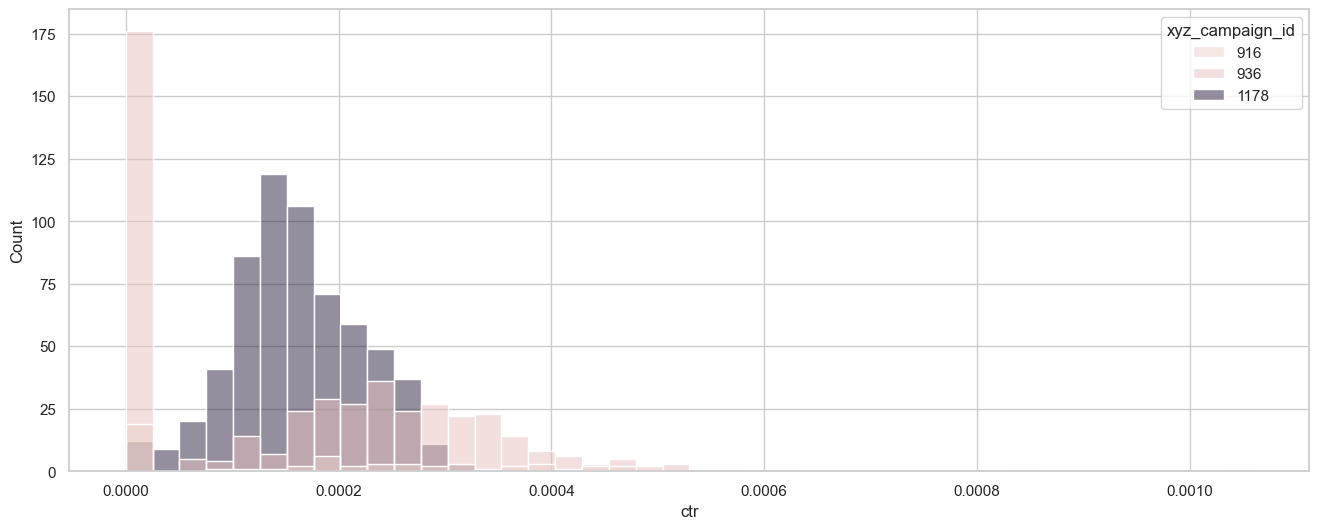

In [92]:
sns.histplot(data=df, hue='xyz_campaign_id', x='ctr')

In [93]:
df['cpc'] = df['spent']/df['clicks']

In [94]:
df['cpc']

0       1.430000
1       0.910000
2            NaN
3       1.250000
4       1.290000
          ...   
1138    1.421389
1139    1.449000
1140    1.438929
1141    1.471926
1142    1.452719
Name: cpc, Length: 1143, dtype: float64

In [95]:
df['cpc'].describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

In [106]:
df['cpc'].dropna()

0       1.430000
1       0.910000
3       1.250000
4       1.290000
6       1.590000
          ...   
1138    1.421389
1139    1.449000
1140    1.438929
1141    1.471926
1142    1.452719
Name: cpc, Length: 936, dtype: float64

In [110]:
df['cpc'].describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

<Axes: xlabel='cpc', ylabel='Count'>

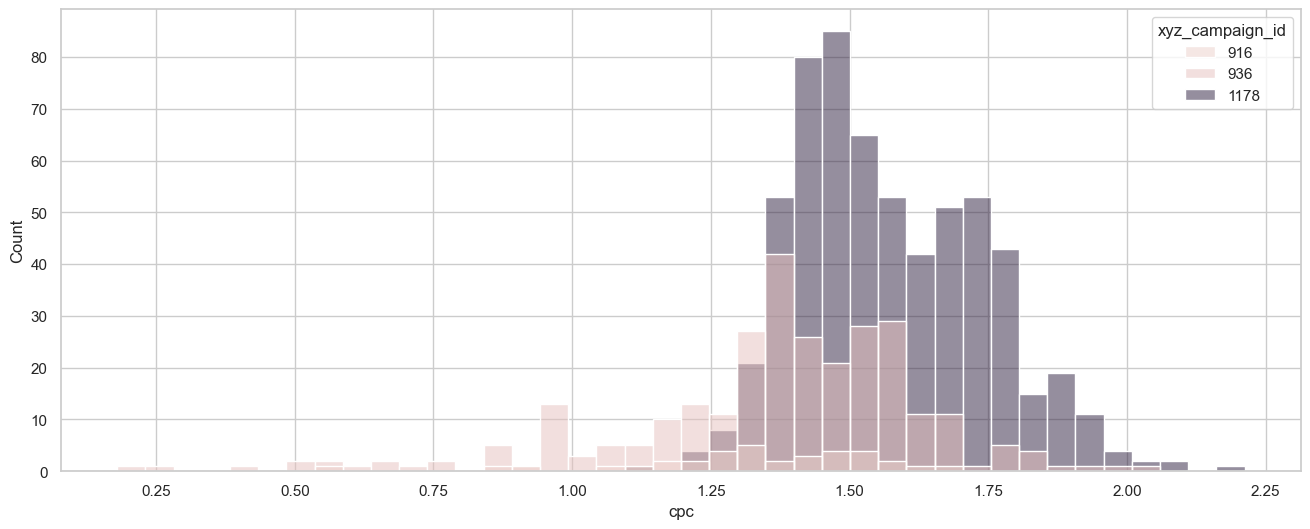

In [107]:
sns.histplot(data=df, x='cpc', hue='xyz_campaign_id')

<Axes: xlabel='cpc'>

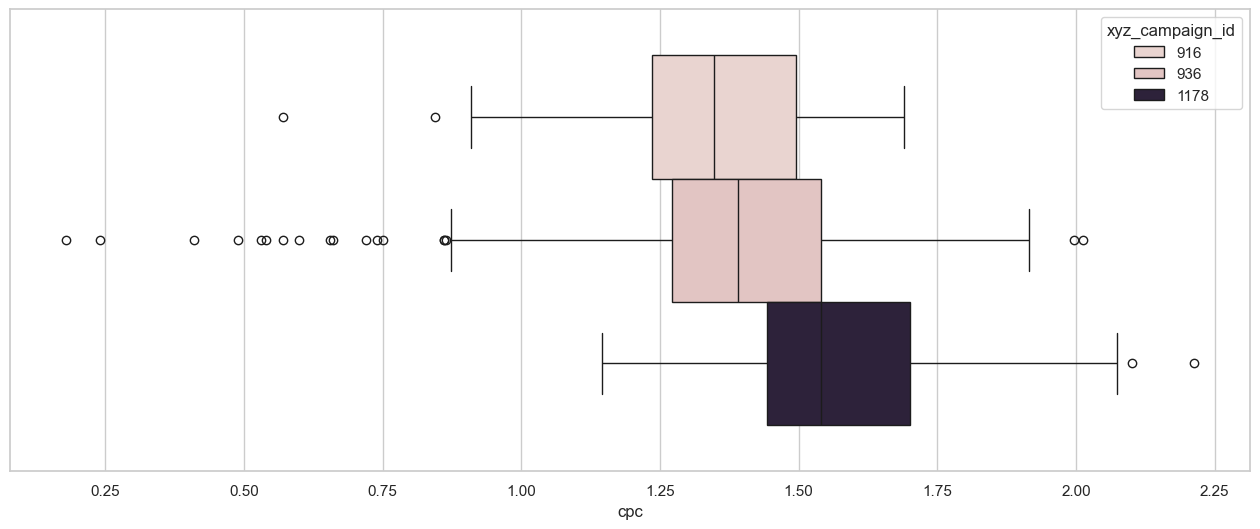

In [108]:
sns.boxplot(data=df, x='cpc', hue='xyz_campaign_id')

In [109]:
iqr = scipy.stats.iqr(df['cpc'])

In [111]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr,cpc
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [130]:
df= df.dropna()

In [131]:
df.cpc

0       1.430000
1       0.910000
3       1.250000
4       1.290000
6       1.590000
          ...   
1138    1.421389
1139    1.449000
1140    1.438929
1141    1.471926
1142    1.452719
Name: cpc, Length: 936, dtype: float64

In [132]:
df.cpc.isna().sum()

np.int64(0)

<Axes: xlabel='cpc', ylabel='Count'>

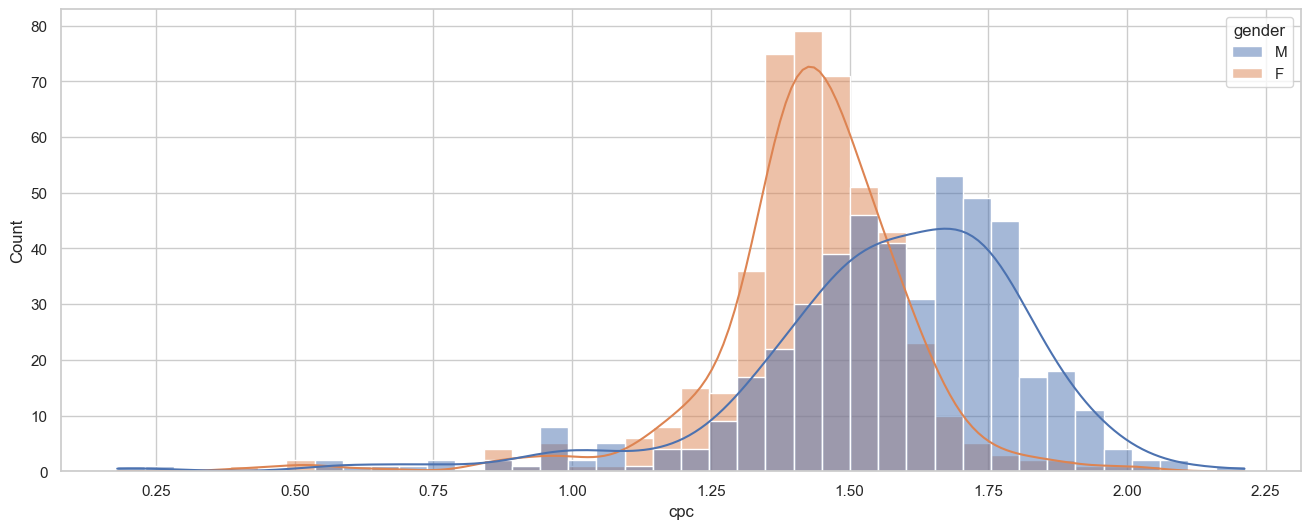

In [134]:
sns.histplot(data=df,x='cpc', hue='gender', kde=True)

In [138]:
df['cr'] = (df['approved_conversion']/df['clicks']).mul(100)

C:\Users\Илья\AppData\Local\Temp\ipykernel_23204\540194160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cr'] = (df['approved_conversion']/df['clicks']).mul(100)


In [139]:
df.cr

0       100.000000
1         0.000000
3         0.000000
4       100.000000
6         0.000000
           ...    
1138      0.793651
1139      0.000000
1140      0.000000
1141      1.481481
1142      1.754386
Name: cr, Length: 936, dtype: float64

In [140]:
df.query('ad_id == 1121814').cr.round(2)

860    3.09
Name: cr, dtype: float64